In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\raosa\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\raosa\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("Life Expectancy.csv")

In [3]:
df.head()

,Country,Year,Life expectancy,Polio incidence,Tuberculosis deaths,Tuberculosis incidence,Malaria deaths,Malaria incidence,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease incidence,Cardiovascular disease deaths,Deaths by suicide,Mean years of schooling,Population,GDP,Gov health expenditure,Undernourishment
0,Afghanistan,2002,56.4538,10,57.0,189.0,2883,79.385790,0.88,4.484723,109.050644,1.181678,761.30500,7.85,1.522516,21000258,1280.4631,1.21,44.1
1,Afghanistan,2003,57.3445,8,58.0,189.0,2188,68.091560,0.86,4.593383,110.698310,1.178583,725.36395,7.72,1.579871,22645136,1292.3335,5.46,39.0
2,Afghanistan,2004,57.9436,4,52.0,189.0,773,37.616467,0.85,4.665421,113.260590,1.174824,714.99800,7.77,1.637226,23553554,1260.0605,3.60,36.3
3,Afghanistan,2005,58.3608,9,47.0,189.0,545,27.079071,0.83,4.708809,115.482414,1.171161,689.62650,7.64,1.694581,24411196,1352.3207,3.37,34.5
4,Afghanistan,2006,58.6844,31,43.0,189.0,414,20.526075,0.81,4.746228,119.301240,1.163760,682.08246,7.56,1.776703,25442946,1366.9932,2.72,31.9


1. polio incidences are total reported polio cases 
2. all the diseases by death are per 100,000 population includeing alcohol and smoking deaths 
3. Undernourishment: Share of individuals that have a daily food intake that is insufficient to provide the amount of dietary energy required to maintain a normal, active, and healthy life.
4. Mean years of schooling: Average number of years adults over 25 years participated in formal education.
5. polio death column is missing , may be cause death caused by polio is low ? 
6. incidence means occurance found and seprates column signifies the deaths by that particular disease

In [4]:
df.shape

(1365, 19)

In [5]:
Country_names=df.Country.unique()
Country_names

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Benin', 'Botswana', 'Brazil',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Iraq', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       'Liberia', 'Madagascar', 'Malawi', 'Malaysia', 'Mali',
       'Mauritania', 'Mexico', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Oman',
       'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Thailand',
       'Togo', 'Turkmenistan', 'U

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1365 non-null   object 
 1   Year                              1365 non-null   int64  
 2   Life expectancy                   1365 non-null   float64
 3   Polio incidence                   1365 non-null   int64  
 4   Tuberculosis deaths               1365 non-null   float64
 5   Tuberculosis incidence            1365 non-null   float64
 6   Malaria deaths                    1365 non-null   int64  
 7   Malaria incidence                 1365 non-null   float64
 8   Alcohol deaths                    1365 non-null   float64
 9   Smoking deaths                    1365 non-null   float64
 10  Obesity deaths                    1365 non-null   float64
 11  Cardiovascular disease incidence  1365 non-null   float64
 12  Cardio

In [7]:
df.describe()

,Year,Life expectancy,Polio incidence,Tuberculosis deaths,Tuberculosis incidence,Malaria deaths,Malaria incidence,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease incidence,Cardiovascular disease deaths,Deaths by suicide,Mean years of schooling,Population,GDP,Gov health expenditure,Undernourishment
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1.365000e+03,1365.000000,1365.000000,1365.000000
mean,2010.675458,65.226921,11.089377,50.167927,218.868154,8512.157509,107.939409,2.203553,8.221386,90.676074,0.710987,328.419556,11.078918,6.244536,6.636804e+07,8097.397661,8.156593,15.871648
std,5.185222,8.134401,82.958312,70.619032,232.809902,27666.298237,155.253436,2.898748,4.671504,51.691503,0.230372,146.301583,8.638906,2.895266,2.092548e+08,9100.763606,4.782531,11.619020
min,2002.000000,42.125400,0.000000,0.350000,0.780000,0.000000,0.000000,0.180000,1.462455,19.872800,0.325559,62.850586,1.650000,0.559420,9.717610e+05,708.532650,0.730000,2.500000
25%,2006.000000,59.349100,0.000000,5.900000,59.000000,1.000000,0.287583,1.000000,4.167106,54.065723,0.573616,227.244230,5.400000,3.959038,6.044130e+06,2230.789000,4.790000,6.200000
50%,2011.000000,65.731400,0.000000,22.000000,146.000000,320.000000,7.454764,1.420000,7.287102,75.565230,0.646832,304.609160,9.450000,6.094085,1.523498e+07,4889.110000,7.130000,13.500000
75%,2015.000000,71.963800,0.000000,68.000000,311.000000,6427.000000,206.647580,1.910000,11.967702,113.876570,0.738809,401.304500,13.849700,8.345284,3.510727e+07,11101.938000,10.250000,21.800000
max,2019.000000,79.726200,1600.000000,533.000000,1590.000000,280604.000000,724.567400,19.930000,22.081902,305.605300,1.566880,829.760250,75.816000,12.874360,1.421864e+09,71782.160000,33.100000,63.500000


observations ->
1. year is till 2019 max and min 2002 for most of the countries and some of the data ranges from 2006 to 2015 
2. av. life expectancy of globe is 65 which is good but will get its insights better going on ? 
3. polio mean is 11 but max showing is 1600 ? why ?
4. the deviation is pretty high for the diseases 
4. adults over 25 usually participated in schooling for over 6 years which is good. finding out more later 

In [8]:
#checking null values
df.isnull().sum()

Country                             0
Year                                0
Life expectancy                     0
Polio incidence                     0
Tuberculosis deaths                 0
Tuberculosis incidence              0
Malaria deaths                      0
Malaria incidence                   0
Alcohol deaths                      0
Smoking deaths                      0
Obesity deaths                      0
Cardiovascular disease incidence    0
Cardiovascular disease deaths       0
Deaths by suicide                   0
Mean years of schooling             0
Population                          0
GDP                                 0
Gov health expenditure              0
Undernourishment                    0
dtype: int64

 there are no null values<br />
 but we should check if years range are all equal or not
 ***
 

## all the countries that dont have complete 18 years of data 

In [9]:
lst=[]
    
for i in Country_names:
    if(len(df[df['Country']==i])!=18):
        lst.append(i)

print(lst)
    
    

['Armenia', 'Djibouti', 'Guinea-Bissau', 'Iraq', 'Kazakhstan', 'Nigeria', 'Sudan', 'United Arab Emirates', 'Zimbabwe']


### printing years that are missing country wise 

In [10]:
years=df.Year.unique()
for i in lst:
    print('\n',i)
    for j in range(2002,2020):
        if(j not in np.array(df[df['Country']==i].Year)):
            print(j,end=' ')


 Armenia
2006 2009 2011 2013 
 Djibouti
2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
 Guinea-Bissau
2002 2003 2004 
 Iraq
2002 
 Kazakhstan
2002 2003 2004 2005 2006 2007 2008 2009 
 Nigeria
2002 
 Sudan
2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
 United Arab Emirates
2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 
 Zimbabwe
2002 2003 2004 2005 2006 2007 2008 2009 

we will be dropping this countries

In [11]:
lst

['Armenia',
 'Djibouti',
 'Guinea-Bissau',
 'Iraq',
 'Kazakhstan',
 'Nigeria',
 'Sudan',
 'United Arab Emirates',
 'Zimbabwe']

### dropping the values

In [12]:
for i in lst:
    idx=df[df['Country']==i].index
    df.drop(idx,inplace=True)
    

### checking the duplicates values in dataframe

In [13]:
df.duplicated().sum()

0

no duplicates values

## what causes the death the most country wise over the year

In [14]:
lst=df.columns
for i,j in enumerate(lst):
    print(i,j)

0 Country
1 Year
2 Life expectancy
3 Polio incidence
4 Tuberculosis deaths
5 Tuberculosis incidence
6 Malaria deaths
7 Malaria incidence
8 Alcohol deaths
9 Smoking deaths
10 Obesity deaths
11 Cardiovascular disease incidence
12 Cardiovascular disease deaths
13 Deaths by suicide
14 Mean years of schooling
15 Population
16 GDP
17 Gov health expenditure
18 Undernourishment


In [15]:
deaths=df[[lst[4],lst[6],lst[8],lst[9],lst[12],lst[13],lst[10]]].groupby(df['Country']).mean()
deaths

,Tuberculosis deaths,Malaria deaths,Alcohol deaths,Smoking deaths,Cardiovascular disease deaths,Deaths by suicide,Obesity deaths
Country,,,,,,,
Afghanistan,42.222222,610.500000,0.751111,5.216688,645.573540,6.739444,144.888307
Algeria,8.138889,0.000000,0.313333,10.650280,343.117581,3.190000,124.233277
Angola,88.111111,12164.111111,1.541667,5.591321,306.405581,14.541206,48.312079
Argentina,2.033333,1.944444,1.849444,15.199574,168.622693,8.677917,68.367044
Azerbaijan,7.844444,0.555556,2.204444,12.492119,670.620126,4.315000,172.915744
...,...,...,...,...,...,...,...
Togo,13.661111,6036.111111,1.271667,5.777784,339.436178,17.610094,65.249917
Turkmenistan,17.777778,0.111111,4.850556,11.850393,610.541317,10.101561,180.945524
Uganda,55.555556,37027.888889,1.775000,4.034333,314.413573,15.047906,48.688449


In [16]:
deaths=deaths.transpose()


In [17]:
deaths

Country,Afghanistan,Algeria,Angola,Argentina,Azerbaijan,Bangladesh,Benin,Botswana,Brazil,Burkina Faso,...,Sierra Leone,South Africa,Sri Lanka,Tajikistan,Thailand,Togo,Turkmenistan,Uganda,Uzbekistan,Zambia
Tuberculosis deaths,42.222222,8.138889,88.111111,2.033333,7.844444,49.777778,14.777778,116.833333,3.794444,15.516667,...,74.611111,255.611111,4.894444,11.316667,28.500000,13.661111,17.777778,55.555556,10.738889,128.388889
Malaria deaths,610.500000,0.000000,12164.111111,1.944444,0.555556,4003.777778,13157.055556,8.388889,440.500000,36106.444444,...,14698.111111,93.833333,5.055556,20.500000,94.500000,6036.111111,0.111111,37027.888889,1.444444,5445.944444
Alcohol deaths,0.751111,0.313333,1.541667,1.849444,2.204444,0.254444,1.282222,1.872222,4.305556,1.491667,...,1.198333,1.388889,2.222778,2.861667,0.788889,1.271667,4.850556,1.775000,1.040000,1.863889
Smoking deaths,5.216688,10.650280,5.591321,15.199574,12.492119,12.228216,3.831504,8.456972,13.886992,2.245588,...,4.424949,7.350368,8.656898,10.109088,12.748025,5.777784,11.850393,4.034333,7.422734,5.459506
Cardiovascular disease deaths,645.573540,343.117581,306.405581,168.622693,670.620126,280.089091,301.803966,395.956919,214.507317,298.222367,...,313.557379,258.517542,173.183434,634.995556,117.090052,339.436178,610.541317,314.413573,631.186704,396.063131
Deaths by suicide,6.739444,3.190000,14.541206,8.677917,4.315000,4.646667,13.971922,31.550972,5.343333,15.579567,...,11.305944,26.423806,18.027044,4.971667,7.929467,17.610094,10.101561,15.047906,9.212128,19.043839
Obesity deaths,144.888307,124.233277,48.312079,68.367044,172.915744,28.249406,79.348267,157.878758,80.023055,54.245350,...,48.134106,155.589548,63.101376,88.686754,39.114268,65.249917,180.945524,48.688449,229.879972,73.507250


In [18]:
values=deaths.max()
values
indexs=deaths.idxmax()


In [19]:
mostdeaths_per_countries=pd.concat([indexs,values],axis=1)

In [20]:
mostdeaths_per_countries.columns=['Disease_name','Values']

In [21]:
mostdeaths_per_countries.Disease_name.unique()

array(['Cardiovascular disease deaths', 'Malaria deaths'], dtype=object)

### observation 
major deaths in all of the countries accross the globe are either due to malaria or cardiovascular disease

## top 10 countries having cardiovascular disease deaths

In [22]:
top10=mostdeaths_per_countries[mostdeaths_per_countries['Disease_name']=='Cardiovascular disease deaths'].sort_values(by='Values',ascending=False)
top10=top10[:10]


In [23]:
top10

,Disease_name,Values
Country,,
Azerbaijan,Cardiovascular disease deaths,670.620126
Afghanistan,Cardiovascular disease deaths,645.573540
Tajikistan,Cardiovascular disease deaths,634.995556
Uzbekistan,Cardiovascular disease deaths,631.186704
Turkmenistan,Cardiovascular disease deaths,610.541317
Georgia,Cardiovascular disease deaths,590.488545
Oman,Cardiovascular disease deaths,548.761199
Kyrgyzstan,Cardiovascular disease deaths,537.729517
Eswatini,Cardiovascular disease deaths,505.553093


In [24]:
import folium

#### function to add the coordinates of the country by their names

In [25]:
from geopy.geocoders import Nominatim
import pycountry

def get_coordinates(country):
    try:
        country_obj = pycountry.countries.get(name=country)
        geolocator = Nominatim(user_agent="http")
        location = geolocator.geocode(country_obj.name)
        return location.latitude, location.longitude
    except AttributeError:
        return None, None

In [26]:
tempcountry=top10.index 

In [27]:
tempcountry=pd.DataFrame(tempcountry)
tempcountry.Country

0      Azerbaijan
1     Afghanistan
2      Tajikistan
3      Uzbekistan
4    Turkmenistan
5         Georgia
6            Oman
7      Kyrgyzstan
8        Eswatini
9         Morocco
Name: Country, dtype: object

In [28]:
#getting longitude and latitude 
tempcountry[['lat','long']]=tempcountry.Country.apply(get_coordinates).apply(pd.Series)


In [29]:
tempcountry

,Country,lat,long
0,Azerbaijan,40.393629,47.787251
1,Afghanistan,33.768006,66.238514
2,Tajikistan,38.628173,70.815654
3,Uzbekistan,41.323730,63.952810
4,Turkmenistan,39.376381,59.392461
5,Georgia,32.329381,-83.113737
6,Oman,21.000029,57.003690
7,Kyrgyzstan,42.485822,74.714583
8,Eswatini,-26.562481,31.399132
9,Morocco,28.334772,-10.371338


In [30]:
maps=folium.Map(location=[0,0],zoom_start=2)

In [31]:
for i in range(len(tempcountry)):
    folium.Marker([tempcountry.iloc[i]['lat'],tempcountry.iloc[i]['long']],popup=tempcountry.iloc[i]['Country']).add_to(maps)

In [32]:
maps

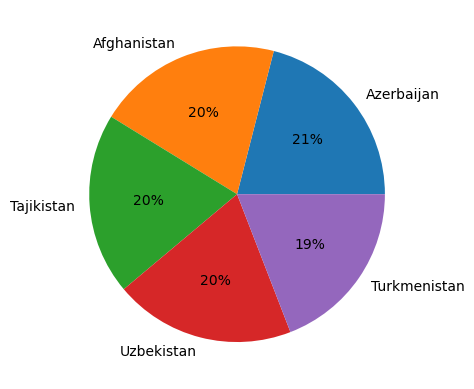

In [33]:
plt.pie(top10.Values[:5],labels=top10.index[:5],autopct='%.0f%%');

## observation 
0. 70% of data from top10 belong to middle east countries and pakistan and some other countries data are also missing 
1. afganistan and azerbaijan have the most cases of cardiovascular diseases 
2. we can middle east countries have little high probablity of getting heart diseases 
3. why there is no usa cause it should have a high cardiovascular rate 


**insights of the data**
there is no usa cause usa data is missing execpt for georgia which is a part of USA

## checking same for malaria


## top 10 countries having Malaria disease deaths

In [34]:
top10=mostdeaths_per_countries[mostdeaths_per_countries['Disease_name']=='Malaria deaths'].sort_values(by='Values',ascending=False)

In [35]:
top10=top10[:10]
top10

,Disease_name,Values
Country,,
India,Malaria deaths,55177.888889
Uganda,Malaria deaths,37027.888889
Burkina Faso,Malaria deaths,36106.444444
Ghana,Malaria deaths,27913.166667
Niger,Malaria deaths,26968.555556
Mali,Malaria deaths,25825.833333
Mozambique,Malaria deaths,25025.555556
Cameroon,Malaria deaths,24035.111111
Ethiopia,Malaria deaths,19441.222222


In [36]:
top10

,Disease_name,Values
Country,,
India,Malaria deaths,55177.888889
Uganda,Malaria deaths,37027.888889
Burkina Faso,Malaria deaths,36106.444444
Ghana,Malaria deaths,27913.166667
Niger,Malaria deaths,26968.555556
Mali,Malaria deaths,25825.833333
Mozambique,Malaria deaths,25025.555556
Cameroon,Malaria deaths,24035.111111
Ethiopia,Malaria deaths,19441.222222


In [37]:
tempcountry=top10.index


tempcountry=pd.DataFrame(tempcountry)
tempcountry.Country

#getting longitude and latitude 
tempcountry[['lat','long']]=tempcountry.Country.apply(get_coordinates).apply(pd.Series)


tempcountry

,Country,lat,long
0,India,22.351115,78.667743
1,Uganda,1.533355,32.216658
2,Burkina Faso,12.075308,-1.688031
3,Ghana,8.030028,-1.080027
4,Niger,17.735621,9.323843
5,Mali,16.370036,-2.290024
6,Mozambique,-19.302233,34.914498
7,Cameroon,4.612552,13.153581
8,Ethiopia,10.211670,38.652120
9,Sierra Leone,8.640035,-11.840027


In [38]:
maps2=folium.Map(location=[0,0],zoom_start=2)

for i in range(len(tempcountry)):
    folium.Marker([tempcountry.iloc[i]['lat'],tempcountry.iloc[i]['long']],popup=tempcountry.iloc[i]['Country']).add_to(maps2)

In [39]:
maps2

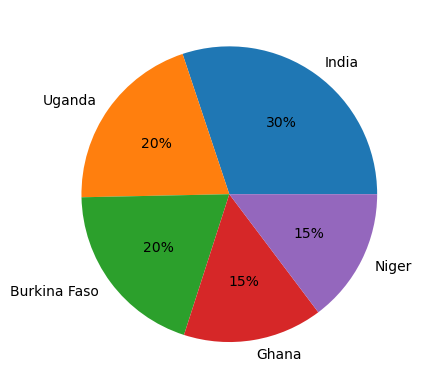

In [40]:
#pie chart 
plt.pie(top10.Values[:5],labels=top10.index[:5],autopct='%.0f%%');

### observations ->
1. india is the top most country in terms of malaria deaths
2. all the other countries i.e 90% of the top10 data belongs to africa continent 

# finding out the life expectancy of each country and low life expectancy places 


In [41]:
dfgrouped=df.groupby('Country').mean()
dfgrouped

,Year,Life expectancy,Polio incidence,Tuberculosis deaths,Tuberculosis incidence,Malaria deaths,Malaria incidence,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease incidence,Cardiovascular disease deaths,Deaths by suicide,Mean years of schooling,Population,GDP,Gov health expenditure,Undernourishment
Country,,,,,,,,,,,,,,,,,,
Afghanistan,2010.5,60.706917,24.833333,42.222222,189.000000,610.500000,25.152164,0.751111,5.216688,144.888307,1.132747,645.573540,6.739444,2.104902,2.930117e+07,1795.990778,2.450000,26.744444
Algeria,2010.5,73.851694,0.000000,8.138889,73.500000,0.000000,0.003001,0.313333,10.650280,124.233277,0.989724,343.117581,3.190000,7.496159,3.657804e+07,10998.466056,9.350556,4.477778
Angola,2010.5,56.437317,14.111111,88.111111,365.611111,12164.111111,227.041142,1.541667,5.591321,48.312079,0.674795,306.405581,14.541206,4.171762,2.424106e+07,7075.980844,4.747778,30.772222
Argentina,2010.5,75.902183,0.000000,2.033333,27.555556,1.944444,0.382019,1.849444,15.199574,68.367044,0.542206,168.622693,8.677917,10.547400,4.134101e+07,21809.017222,16.143333,3.427778
Azerbaijan,2010.5,69.793011,0.000000,7.844444,83.388889,0.555556,0.590249,2.204444,12.492119,172.915744,1.202509,670.620126,4.315000,10.528138,9.307928e+06,11856.222222,3.202778,3.938889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Togo,2010.5,57.778017,1.000000,13.661111,61.833333,6036.111111,363.168220,1.271667,5.777784,65.249917,0.642525,339.436178,17.610094,4.163262,6.691179e+06,1726.914861,4.899444,23.383333
Turkmenistan,2010.5,67.735644,0.166667,17.777778,72.722222,0.111111,0.005525,4.850556,11.850393,180.945524,1.137440,610.541317,10.101561,10.995907,5.364507e+06,9285.625733,9.762778,5.344444
Uganda,2010.5,57.278650,0.666667,55.555556,215.944444,37027.888889,372.762262,1.775000,4.034333,48.688449,0.586983,314.413573,15.047906,5.174841,3.331422e+07,1848.190811,6.650556,22.922222


In [42]:
highLifeExp=dfgrouped.sort_values(by='Life expectancy',ascending=False)
lowLifeExp=dfgrouped.sort_values(by='Life expectancy')
lower=lowLifeExp
lowLifeExp=lowLifeExp[:10]
highLifeExp=highLifeExp[:10]


### high life expectancy places 

In [43]:
places=list(highLifeExp.index)
values=list(highLifeExp['Life expectancy'])

In [44]:
pvalues=[]
m=highLifeExp['Life expectancy'].max()
for i,j in enumerate(values):
    temp=round((j/m)*100,2)
    pvalues.append(temp)


In [45]:
data={'Country':places,
      'values':values,
        'percentage':pvalues}
df1=pd.DataFrame(data)


In [46]:
tempcountry=highLifeExp.index


tempcountry=pd.DataFrame(tempcountry)
tempcountry.Country

#getting longitude and latitude 
tempcountry[['lat','long']]=tempcountry.Country.apply(get_coordinates).apply(pd.Series)


tempcountry

,Country,lat,long
0,Costa Rica,10.273563,-84.073910
1,Panama,8.559559,-81.130843
2,Thailand,7.493186,124.724704
3,Oman,21.000029,57.003690
4,Argentina,-34.996496,-64.967282
5,Saudi Arabia,25.624262,42.352833
6,China,35.000074,104.999927
7,Ecuador,-1.339767,-79.366697
8,Colombia,4.099917,-72.908813
9,Malaysia,4.569375,102.265682


In [47]:
maps3=folium.Map(location=[0,0],zoom_start=2)

for i in range(len(tempcountry)):
    folium.Marker([tempcountry.iloc[i]['lat'],tempcountry.iloc[i]['long']],popup=tempcountry.iloc[i]['Country']).add_to(maps3)
maps3

In [48]:
df1

,Country,values,percentage
0,Costa Rica,78.849761,100.00
1,Panama,76.606494,97.16
2,Thailand,76.114550,96.53
3,Oman,76.060722,96.46
4,Argentina,75.902183,96.26
5,Saudi Arabia,75.764800,96.09
6,China,75.650839,95.94
7,Ecuador,75.623561,95.91
8,Colombia,74.839533,94.91
9,Malaysia,74.654572,94.68


## observations->
1. highest life expectancy is almost 79 
2. top 10 countries have almost similar (differnce is less than 7%) 
3. china has high expectancy rate which is suprising considering their population

## low life expactancy 

In [49]:
tempcountry=lowLifeExp.index


tempcountry=pd.DataFrame(tempcountry)
tempcountry.Country

#getting longitude and latitude 
tempcountry[['lat','long']]=tempcountry.Country.apply(get_coordinates).apply(pd.Series)


tempcountry

,Country,lat,long
0,Eswatini,-26.562481,31.399132
1,Central African Republic,7.032360,19.998123
2,Chad,15.613414,19.015617
3,Sierra Leone,8.640035,-11.840027
4,Mozambique,-19.302233,34.914498
5,Burkina Faso,12.075308,-1.688031
6,Zambia,-14.518912,27.558988
7,Mali,16.370036,-2.290024
8,Angola,-11.877577,17.569124
9,Guinea,10.722623,-10.708359


In [50]:
maps3=folium.Map(location=[0,0],zoom_start=2)

for i in range(len(tempcountry)):
    folium.Marker([tempcountry.iloc[i]['lat'],tempcountry.iloc[i]['long']],popup=tempcountry.iloc[i]['Country']).add_to(maps3)

In [51]:
maps3

In [52]:
places=list(lowLifeExp.index)
values=list(lowLifeExp['Life expectancy'])

pvalues=[]
m=lowLifeExp['Life expectancy'].max()
for i,j in enumerate(values):
    temp=round((j/m)*100,2)
    pvalues.append(temp)


data={'Country':places,
      'values':values,
        'percentage':pvalues}
df1=pd.DataFrame(data)
df1

,Country,values,percentage
0,Eswatini,49.266194,86.88
1,Central African Republic,49.739244,87.72
2,Chad,50.118578,88.39
3,Sierra Leone,53.541233,94.42
4,Mozambique,55.159600,97.28
5,Burkina Faso,56.288156,99.27
6,Zambia,56.303300,99.30
7,Mali,56.340800,99.36
8,Angola,56.437317,99.53
9,Guinea,56.702950,100.00


## observations->
1. while high life expectancy didnt form the clusters but low life expectancy did
2. all the top10 countries belong to the africa continent 
3. factors could be undernourishment
4. major factor could be death by disease as we analysed earlier that large deaths occur in africa due to malaria 

## india


In [53]:
india=df[df['Country']=='India']
india

,Country,Year,Life expectancy,Polio incidence,Tuberculosis deaths,Tuberculosis incidence,Malaria deaths,Malaria incidence,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease incidence,Cardiovascular disease deaths,Deaths by suicide,Mean years of schooling,Population,GDP,Gov health expenditure,Undernourishment
612,India,2002,63.6160,1600,83.0,320.0,80138,18.537405,1.99,10.847386,37.413837,0.783372,279.02606,18.1643,4.298287,1098313088,2699.1782,2.77,19.9
613,India,2003,64.0942,225,76.0,318.0,78316,19.485119,1.94,10.838186,38.087753,0.793244,268.03983,17.2549,4.375344,1117415168,2861.5747,2.68,21.4
614,India,2004,64.5244,134,69.0,315.0,77383,21.270773,1.86,10.565377,37.375950,0.801405,248.88284,16.8191,4.452402,1136264576,3037.0637,2.65,22.0
615,India,2005,64.9955,66,65.0,311.0,71265,22.630566,1.87,10.548028,38.695473,0.804568,249.27300,17.0138,4.529458,1154638720,3225.5444,2.94,21.4
616,India,2006,65.4123,676,62.0,305.0,71129,18.225904,1.90,10.622119,40.110720,0.800811,258.24124,17.1433,4.636587,1172373760,3432.8193,2.89,19.4
617,India,2007,65.7884,874,58.0,298.0,68053,17.357033,1.94,10.669035,41.106167,0.792426,263.34210,16.6861,4.743715,1189691776,3642.0024,2.79,17.2
618,India,2008,66.1490,559,56.0,291.0,62028,17.909378,1.98,10.768356,41.730473,0.782243,266.57727,16.3159,4.850843,1206734848,3701.3955,2.80,16.2
619,India,2009,66.5132,756,51.0,283.0,58617,18.142403,1.92,10.768999,40.514790,0.773125,254.52548,15.5866,4.957972,1223640192,3937.2375,3.12,16.0
620,India,2010,66.9086,44,47.0,276.0,60236,17.531942,1.90,10.718889,40.534405,0.768020,246.80844,15.5634,5.065100,1240613632,4213.3630,3.11,15.7
621,India,2011,67.3590,1,44.0,268.0,63142,14.796841,1.91,10.722455,41.890430,0.767009,249.09158,15.5038,5.301910,1257621248,4374.2324,3.38,15.4


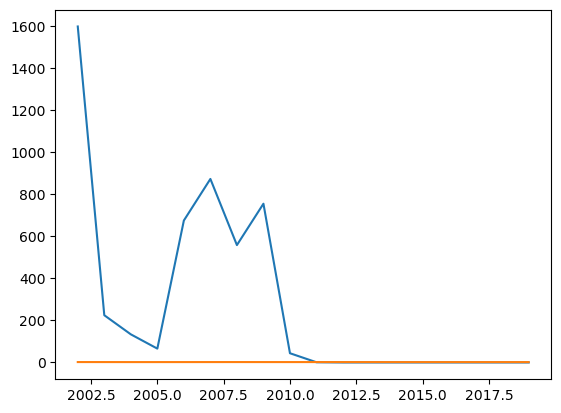

In [54]:
plt.plot(india['Year'],india['Polio incidence'])
plt.plot(india['Year'],india['Alcohol deaths'])

#### due to improper scaling we cant compare them 

## scaling or transforming the data 

In [55]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [56]:
for i,j in enumerate(lst):
    print(i,j)

0 Country
1 Year
2 Life expectancy
3 Polio incidence
4 Tuberculosis deaths
5 Tuberculosis incidence
6 Malaria deaths
7 Malaria incidence
8 Alcohol deaths
9 Smoking deaths
10 Obesity deaths
11 Cardiovascular disease incidence
12 Cardiovascular disease deaths
13 Deaths by suicide
14 Mean years of schooling
15 Population
16 GDP
17 Gov health expenditure
18 Undernourishment


In [57]:
india.head()

,Country,Year,Life expectancy,Polio incidence,Tuberculosis deaths,Tuberculosis incidence,Malaria deaths,Malaria incidence,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease incidence,Cardiovascular disease deaths,Deaths by suicide,Mean years of schooling,Population,GDP,Gov health expenditure,Undernourishment
612,India,2002,63.6160,1600,83.0,320.0,80138,18.537405,1.99,10.847386,37.413837,0.783372,279.02606,18.1643,4.298287,1098313088,2699.1782,2.77,19.9
613,India,2003,64.0942,225,76.0,318.0,78316,19.485119,1.94,10.838186,38.087753,0.793244,268.03983,17.2549,4.375344,1117415168,2861.5747,2.68,21.4
614,India,2004,64.5244,134,69.0,315.0,77383,21.270773,1.86,10.565377,37.375950,0.801405,248.88284,16.8191,4.452402,1136264576,3037.0637,2.65,22.0
615,India,2005,64.9955,66,65.0,311.0,71265,22.630566,1.87,10.548028,38.695473,0.804568,249.27300,17.0138,4.529458,1154638720,3225.5444,2.94,21.4
616,India,2006,65.4123,676,62.0,305.0,71129,18.225904,1.90,10.622119,40.110720,0.800811,258.24124,17.1433,4.636587,1172373760,3432.8193,2.89,19.4


In [58]:
for i,j in enumerate(lst):
    print(i,j)

0 Country
1 Year
2 Life expectancy
3 Polio incidence
4 Tuberculosis deaths
5 Tuberculosis incidence
6 Malaria deaths
7 Malaria incidence
8 Alcohol deaths
9 Smoking deaths
10 Obesity deaths
11 Cardiovascular disease incidence
12 Cardiovascular disease deaths
13 Deaths by suicide
14 Mean years of schooling
15 Population
16 GDP
17 Gov health expenditure
18 Undernourishment


In [59]:
values=[lst[3],lst[4],lst[6],lst[8],lst[9],lst[10],lst[12]]
print(len(values))
values

7


['Polio incidence',
 'Tuberculosis deaths',
 'Malaria deaths',
 'Alcohol deaths',
 'Smoking deaths',
 'Obesity deaths',
 'Cardiovascular disease deaths']

#### converting with the help of MinMaxScaler cause it give a range of [0,1]

In [60]:
 from sklearn.preprocessing import MinMaxScaler
def scaling(lst):
   
    std=MinMaxScaler()
    returnvalues=std.fit_transform(india[[i]])
    return returnvalues

In [61]:
indiatrans=pd.DataFrame()
for i in values:
    transform=scaling(i)
    indiatrans[i]=transform[:,0]

In [62]:
indiatrans['year']=india['Year'].values

#### transformed data 

In [63]:
indiatrans

,Polio incidence,Tuberculosis deaths,Malaria deaths,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease deaths,year
0,1.000000,1.000000,1.000000,1.00,0.469889,0.002664,1.000000,2002
1,0.140625,0.879310,0.964122,0.80,0.455448,0.050051,0.776711,2003
2,0.083750,0.758621,0.945750,0.48,0.027232,0.000000,0.387356,2004
3,0.041250,0.689655,0.825276,0.52,0.000000,0.092784,0.395286,2005
4,0.422500,0.637931,0.822598,0.64,0.116297,0.192299,0.577560,2006
5,0.546250,0.568966,0.762027,0.80,0.189939,0.262296,0.681232,2007
6,0.349375,0.534483,0.643385,0.96,0.345839,0.306195,0.746985,2008
7,0.472500,0.448276,0.576216,0.72,0.346848,0.220712,0.502040,2009
8,0.027500,0.379310,0.608097,0.64,0.268193,0.222092,0.345195,2010
9,0.000625,0.327586,0.665321,0.68,0.273790,0.317442,0.391599,2011


#### the main feature about minmaxscaler is also that it doesnt distrub the distribution of data 

(array([3., 1., 1., 5., 2., 2., 1., 2., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

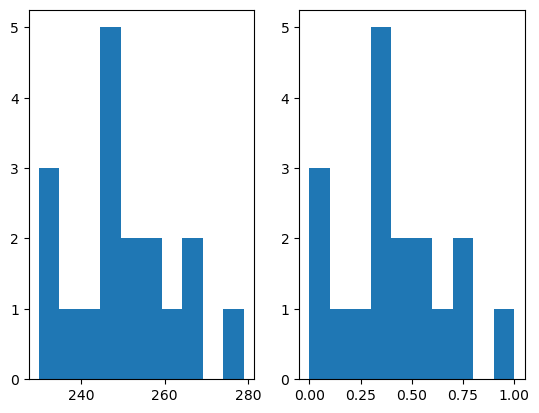

In [64]:
plt.subplot(1,2,1)
plt.hist(india['Cardiovascular disease deaths'])
plt.subplot(1,2,2)
plt.hist(indiatrans['Cardiovascular disease deaths'])

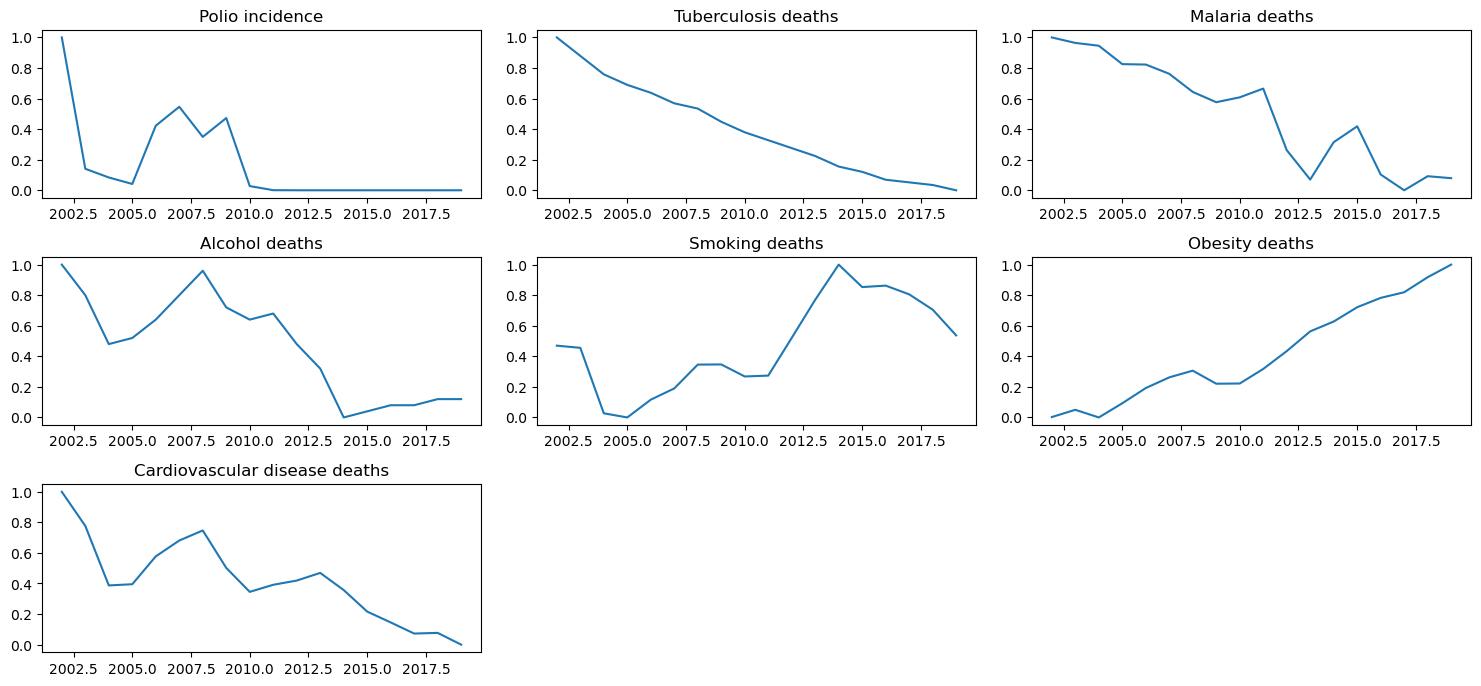

In [65]:
plt.figure(figsize=(15,9),tight_layout=True)
plt.tight_layout()
for i in range(len(indiatrans.columns)-1):
    plt.subplot(4,3,i+1)
    plt.plot(indiatrans.year,indiatrans[indiatrans.columns[i]])
    plt.title(indiatrans.columns[i])


### observation ->
1. polio incidence after 2010 came to zero which was a very great achivement by india
2. Malaria , Alcohol and Cardiovascular deaths decreases over time 
3. Tuberculosis shown the steady decrease over the time 
4. Obseity level increased in india over the time


In [66]:
ind=indiatrans
ind=ind.drop(columns=['year'],axis=1)


In [67]:
ind

,Polio incidence,Tuberculosis deaths,Malaria deaths,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease deaths
0,1.000000,1.000000,1.000000,1.00,0.469889,0.002664,1.000000
1,0.140625,0.879310,0.964122,0.80,0.455448,0.050051,0.776711
2,0.083750,0.758621,0.945750,0.48,0.027232,0.000000,0.387356
3,0.041250,0.689655,0.825276,0.52,0.000000,0.092784,0.395286
4,0.422500,0.637931,0.822598,0.64,0.116297,0.192299,0.577560
5,0.546250,0.568966,0.762027,0.80,0.189939,0.262296,0.681232
6,0.349375,0.534483,0.643385,0.96,0.345839,0.306195,0.746985
7,0.472500,0.448276,0.576216,0.72,0.346848,0.220712,0.502040
8,0.027500,0.379310,0.608097,0.64,0.268193,0.222092,0.345195
9,0.000625,0.327586,0.665321,0.68,0.273790,0.317442,0.391599


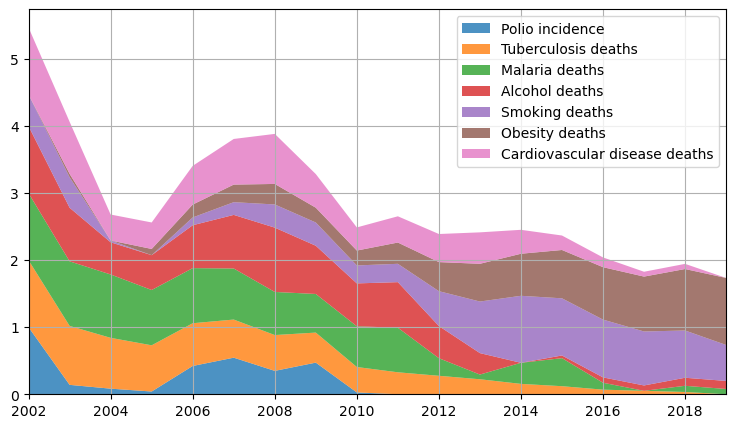

In [68]:
plt.figure(figsize=(9,5))
plt.stackplot(indiatrans.year,ind.T,labels=indiatrans.columns,alpha=0.8)
plt.legend()
plt.grid()
ax=plt.gca()
ax.set_xlim(left=2002,right=2019)
plt.show()

### observations ->
1. Around 2005 to 2008 we saw the rise and peak of all diseases death in india 
2. Tuberculosis death decrease to almost after 2016 , while Polio death comes to almost 0 after 2010
3. Obesity and smoking are the major causes of death after 2014
4. while the cardiovascular death decreased over time the obseiry rate increased which is unusual
5. Malaria death which was major cause of death in india also decreased over the time 


# india population growth vs other countries population growth 

In [69]:
#idea is create a function to calcualte the % of change in each country and compare them 
def rate_of_growth(newseries):
    series=newseries.reset_index()
    if(series.empty):
        pass
    else:
        val1=series.Population[0]
        val2=series.Population[17]
        rate=(val2-val1)/val1
        return round(rate*100,2)
    

In [70]:
val=[]
names=[]
for i in range(len(Country_names)):
    cname=Country_names[i]
    temp=rate_of_growth(df[df['Country']==cname]['Population'])
    if(temp!=None):
        val.append(temp)
        names.append(cname)
    

In [71]:
for i in zip(val,names):
    print(i)
    break

(79.85, 'Afghanistan')


In [72]:
rate=pd.DataFrame(zip(names,val),columns=['names','values'])

In [73]:
rate.sort_values(by='values',ascending=False)

,names,values
50,Oman,91.49
49,Niger,88.20
2,Angola,84.71
13,Chad,82.46
0,Afghanistan,79.85
...,...,...
22,Eswatini,11.31
64,Thailand,11.03
14,China,11.00
21,El Salvador,4.47


### observation ->
only georiga is that country where which the rate of growth is negitive which means their populations is declining over the years and with a rate of -7.15 it is concerning

In [74]:
rate[rate['names']=='India'] 


,names,values
32,India,25.93


### observation ->

india ranks 32 in terms of rate of growth of population 


## top 5 most populated countries 

In [75]:
checking=df.groupby('Country').mean()
top5=checking.sort_values(by='Population',ascending=False)[:5]
top5

,Year,Life expectancy,Polio incidence,Tuberculosis deaths,Tuberculosis incidence,Malaria deaths,Malaria incidence,Alcohol deaths,Smoking deaths,Obesity deaths,Cardiovascular disease incidence,Cardiovascular disease deaths,Deaths by suicide,Mean years of schooling,Population,GDP,Gov health expenditure,Undernourishment
Country,,,,,,,,,,,,,,,,,,
China,2010.5,75.650839,1.444444,4.288889,77.111111,16.944444,0.019877,1.181667,21.037350,37.330402,0.656754,254.995542,9.522928,6.806594,1.352964e+09,9449.431161,8.299444,4.238889
India,2010.5,67.367817,274.166667,48.055556,267.944444,55177.888889,14.053586,1.857778,10.850559,43.326465,0.777255,250.490243,15.158422,5.377714,1.246555e+09,4438.102089,3.167778,16.461111
Indonesia,2010.5,68.684978,19.555556,46.222222,340.555556,2305.611111,5.545273,0.272222,12.642058,62.977089,0.644064,322.279650,2.948889,7.508541,2.453582e+08,8577.995094,5.462222,12.716667
Brazil,2010.5,73.135017,0.000000,3.794444,46.277778,440.500000,8.584005,4.305556,13.886992,80.023055,0.493012,214.507317,5.343333,6.932775,1.968675e+08,14044.939222,9.118889,4.422222
Pakistan,2010.5,64.564350,94.611111,27.222222,272.944444,4831.611111,5.898941,1.480556,13.312354,83.243682,0.939191,422.962917,10.383822,4.632964,1.946645e+08,4223.666211,3.753889,15.005556


In [76]:
places=list(top5.index)
values=list(top5.Population.values)
pvalues=[]
m=top5.Population.max()

In [77]:
pvalues=values/m
pvalues=list(pvalues)
for i,j in enumerate(pvalues):
    pvalues[i]=np.round(j*100,2)
pvalues

[100.0, 92.14, 18.13, 14.55, 14.39]

In [78]:
data={'places':places,'values':values,'percentage':pvalues}
df1=pd.DataFrame(data)
df1

,places,values,percentage
0,China,1.352964e+09,100.00
1,India,1.246555e+09,92.14
2,Indonesia,2.453582e+08,18.13
3,Brazil,1.968675e+08,14.55
4,Pakistan,1.946645e+08,14.39


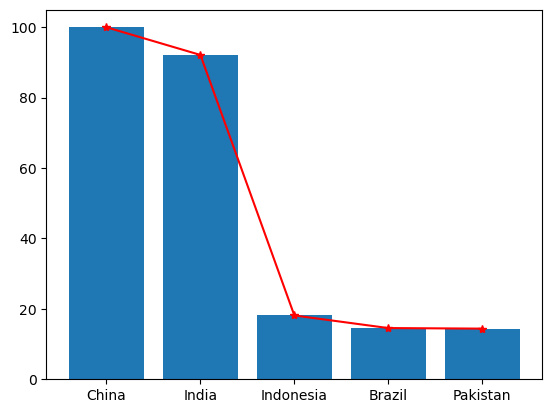

In [79]:
plt.bar(places,pvalues)
plt.plot(places,pvalues,marker='*',c='r')

## observation -> 
1. china india supperior in terms of populations  
2. the difference between the india,china and rest of the world in terms of population is 76%
3. the differnce between the china and india is 8%
